In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [3]:
nlp = spacy.load("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

In [5]:
# load text file
with open('Objective_with_time_frame.txt', 'r', encoding='utf8') as file:
    text = file.read().replace('\n', '')

In [6]:
per_country = text.split('Files\\\\')[1:]
countries = [count.split('-')[0][:-1] for count in per_country]

In [7]:
# stopwords
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(spacy_stopwords)

{'your', 'hundred', 'forty', 'much', 'every', 'moreover', 'noone', 'meanwhile', 'ourselves', 'my', 'then', 'of', 'show', 'being', 'from', 'toward', 'it', 'various', 'where', 'mine', 'per', 'ever', 'put', 'so', 'few', 'name', 'move', 'formerly', 'was', 'been', 'whence', 'further', 'whether', 'on', 'whom', 'not', 'one', 'many', 'too', 'however', 'among', '‘s', 'latter', 're', '’re', "n't", 'about', 'sixty', 'each', 'least', 'upon', 'fifteen', 'whole', 'afterwards', 'whereafter', 'anywhere', 'both', 'some', 'can', 'as', 'via', 'had', 'sometimes', 'again', 'below', 'unless', 'due', 'back', 'will', 'give', 'mostly', 'wherever', 'first', 'seems', 'enough', 'them', '‘d', 'really', 'these', 'still', 'anyone', 'regarding', 'last', 'another', 'thus', 'through', 'together', 'because', '‘re', 'namely', 'here', 'used', 'most', 'how', 'himself', 'us', 'the', 'you', 'eight', 'may', 'otherwise', '’d', 'see', 'by', 'this', 'beforehand', 'anyhow', 'does', 'when', 'its', 'who', 'above', 'he', 'therein', 

In [8]:
text = []
for count in per_country:
    references = count.split('% Coverage')[2:]
    references_together = ''
    for i,ref in enumerate(references):
        if i != 0:
            if references_together[-1] != '.':
                references_together += '.'
            references_together += ' '
        references_together += ref.split('Reference')[0]
    #remove stopwords
    doc = nlp(references_together)
    cleaned = ''
    for word in doc:
        if word.is_stop==False:
            cleaned+=str(word)
            cleaned += ' '
    text.append(cleaned)

In [9]:
vectors = []
for i,txt in enumerate(text):
    doc = nlp(txt[:724])
    vector = doc.vector
    vectors.append(vector)

vectors = np.array(vectors)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [10.0, 10.0, 47.5, 47.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [28.75, 28.75, 92.5, 92.5]],
 'dcoord': [[0.0, 11.280301506051972, 11.280301506051972, 0.0],
  [0.0, 6.57732649208943, 6.57732649208943, 0.0],
  [0.0, 9.283305661466054, 9.283305661466054, 6.57732649208943],
  [0.0, 8.81007702511965, 8.81007702511965, 0.0],
  [0.0, 11.265252175680196, 11.265252175680196, 8.81007702511965],
  [9.283305661466054,
   12.708956849688045,
   12.708956849688045,
   11.265252175680196],
  [11.280301506051972,
   16.01649526229095,
   16.01649526229095,
   12.708956849688045],
  [0.0, 12.380341114026388, 12.380341114026388, 0.0],
  [0.0, 20.545910313114646, 20.545910313114646, 12.380341114026388],
  [16.01649526229095,
   27.978486768297792,
   27.978486768297792,
   20.545910313114646]],
 'ivl': ['

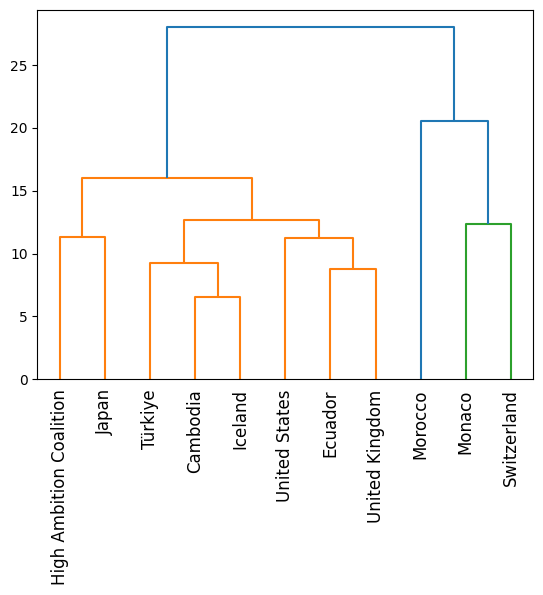

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectors, 'ward')
dendrogram(Z, labels=countries, leaf_rotation=90)

In [20]:
from scipy.cluster.vq import vq, kmeans, whiten

whitened = whiten(vectors)
centroids,_ = kmeans(whitened, 5)
idx,_ = vq(whitened, centroids)


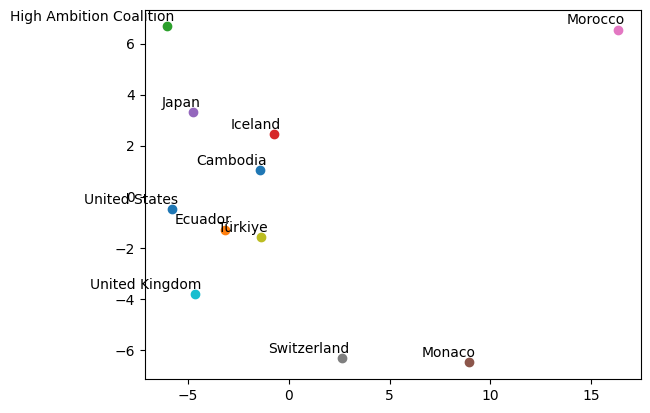

In [24]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

# label each point with its country
for i, country in enumerate(countries):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(country, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

In [17]:
countries

['Cambodia',
 'Ecuador',
 'High Ambition Coalition',
 'Iceland',
 'Japan',
 'Monaco',
 'Morocco',
 'Switzerland',
 'Türkiye',
 'United Kingdom',
 'United States']